In [1]:
import pickle

import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
import torch

from dataset import TrainDataset, InferenceDataset, Normalizer
import proj_tools
import plotting

%load_ext autoreload
%autoreload 2

In [2]:
# Full sky mollview
gi, gq, gu, tau, hiq, hiu, res_mask = proj_tools.get_full_sky_maps()

In [10]:
qmin = np.quantile(gq, 0.005)
qmax = np.quantile(gq, 0.995)
umin = np.quantile(gu, 0.005)
umax = np.quantile(gu, 0.995)
hiqmin = np.quantile(hiq, 0.005)
hiqmax = np.quantile(hiq, 0.995)
hiumin = np.quantile(hiu, 0.005)
hiumax = np.quantile(hiu, 0.995)
tmin = np.quantile(tau, 0.005)
tmax = np.quantile(tau, 0.995)

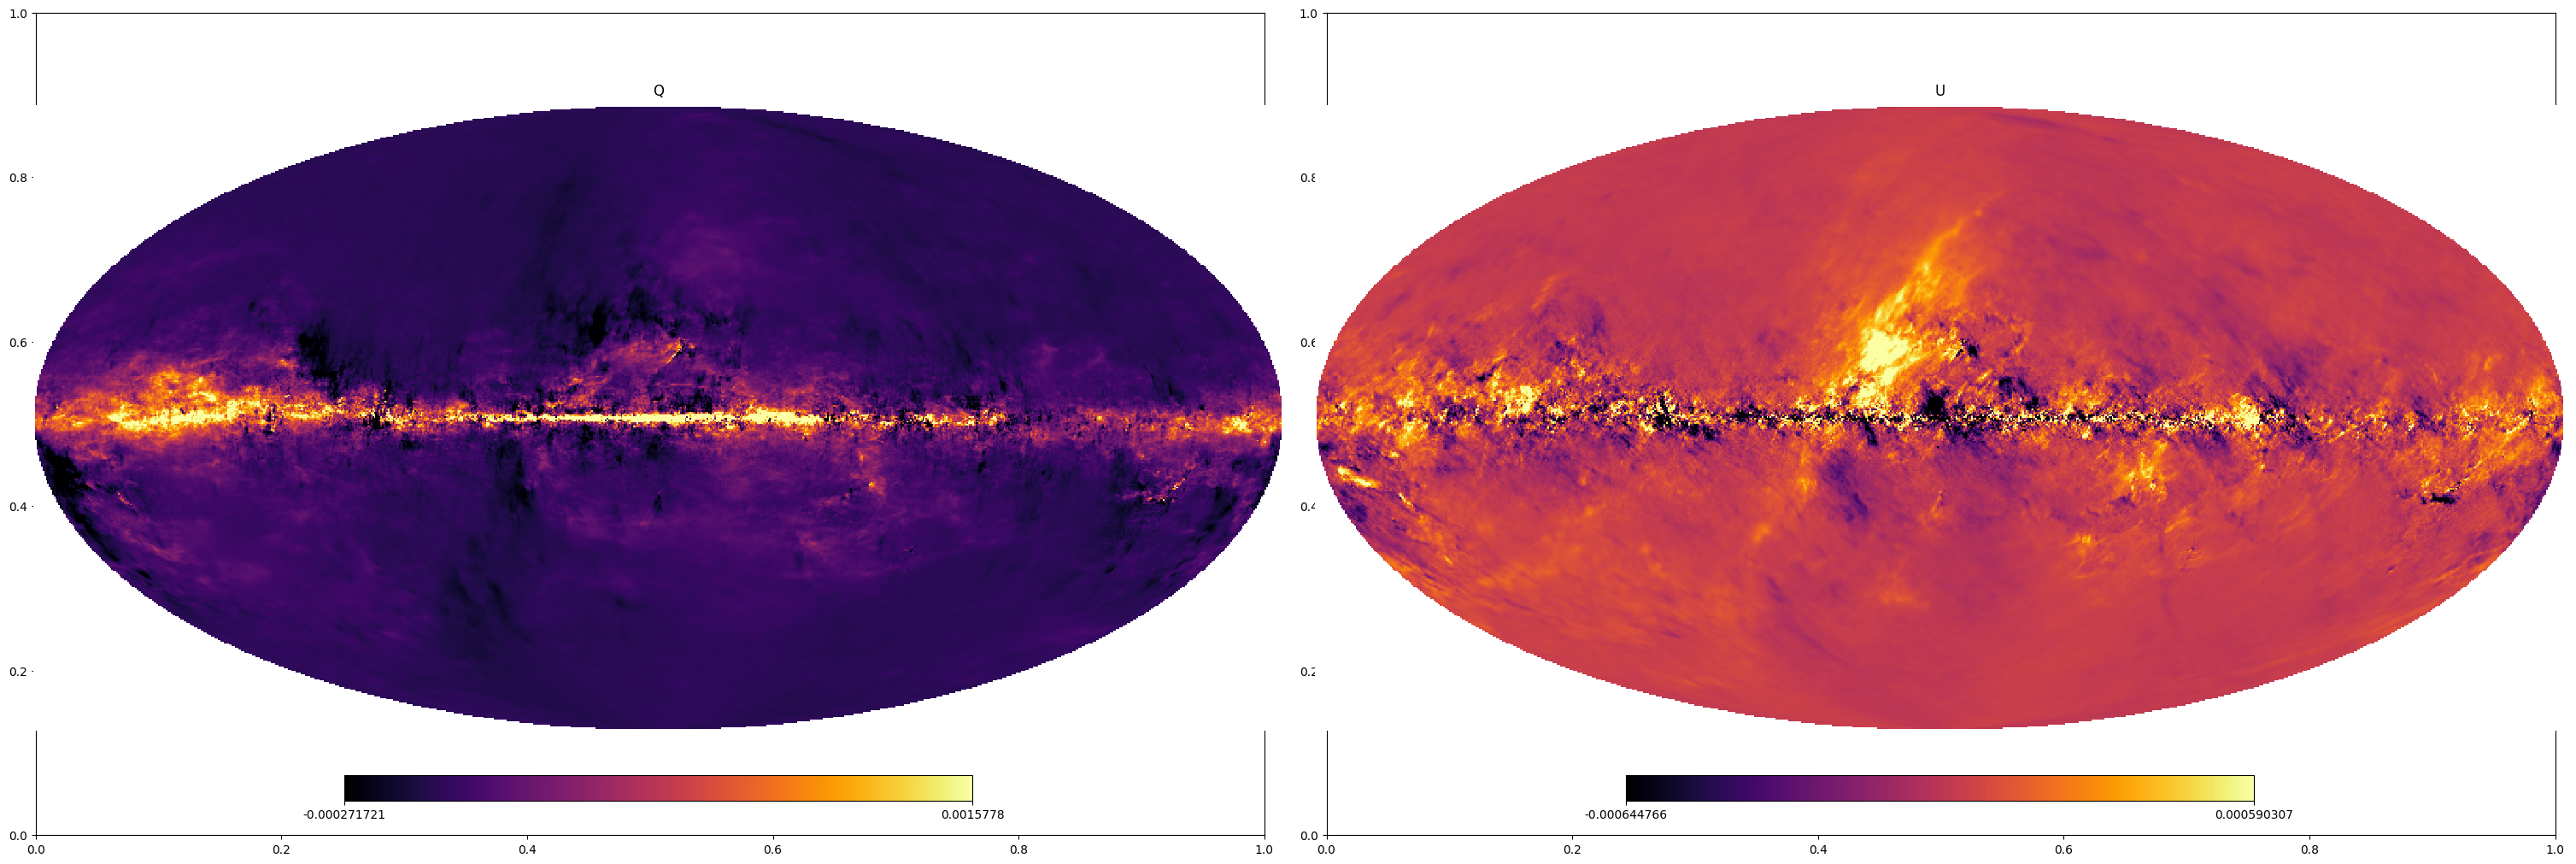

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10), constrained_layout=True)
hp.mollview(gq, title='Q', cmap='inferno', sub=(1,2,1), min=qmin, max=qmax)
hp.mollview(-1*gu, title='U', cmap='inferno', sub=(1,2,2), min=umin, max=umax)
plt.show()

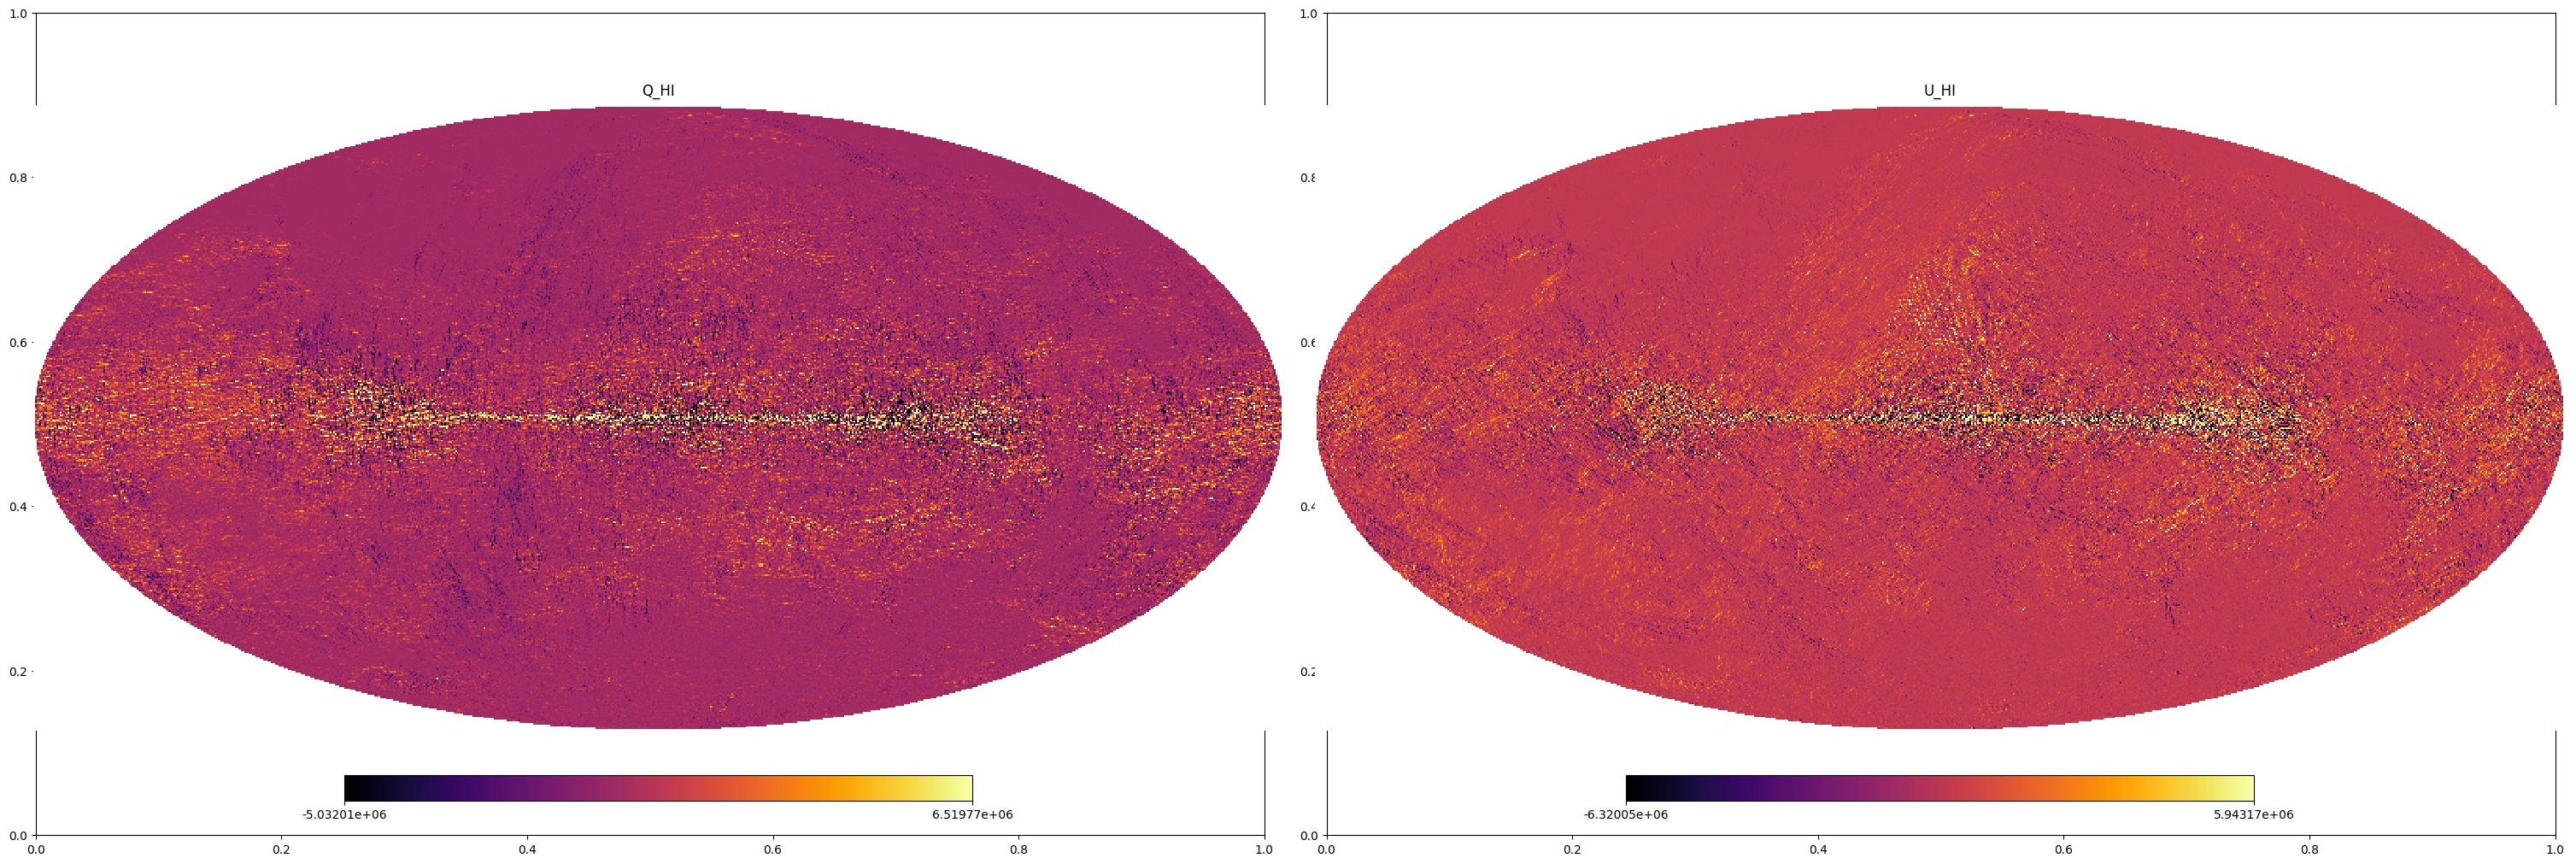

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10), constrained_layout=True)
hp.mollview(hiq, title='Q_HI', cmap='inferno', sub=(1,2,1), min=hiqmin, max=hiqmax)
hp.mollview(-1*hiu, title='U_HI', cmap='inferno', sub=(1,2,2), min=hiumin, max=hiumax)
plt.show()

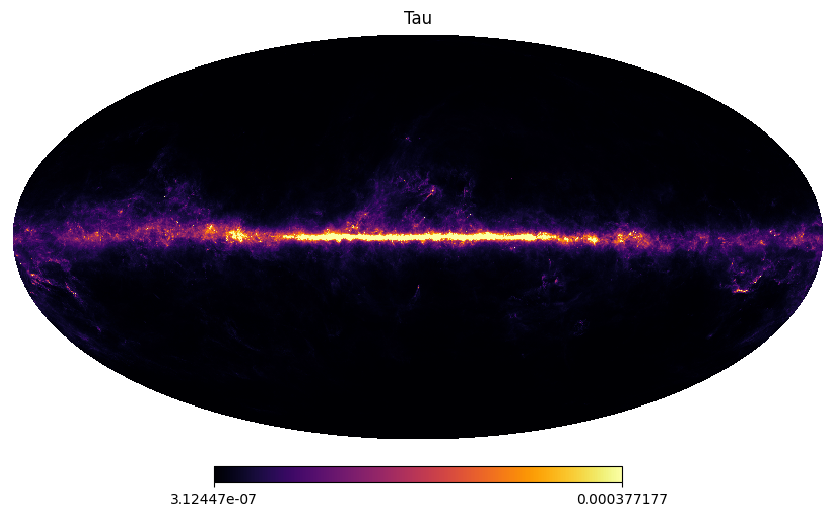

In [13]:
hp.mollview(tau, title='Tau', cmap='inferno', min=tmin, max=tmax)

In [10]:
# centers
with open('data/training_centers.pkl', 'rb') as f:
    train_centers = pickle.load(f)
with open('data/inference_centers.pkl', 'rb') as f:
    inference_centers = pickle.load(f)

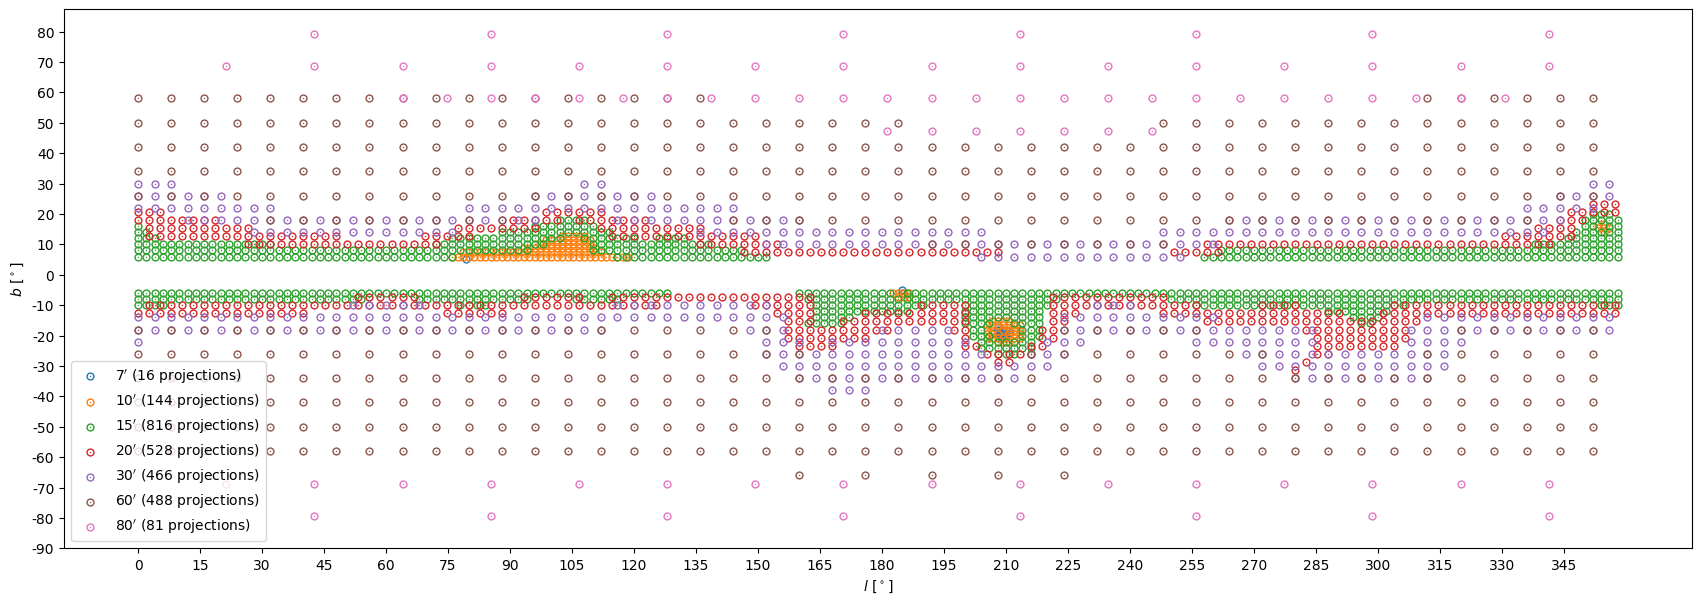

In [13]:
plotting.plot_centers(train_centers)

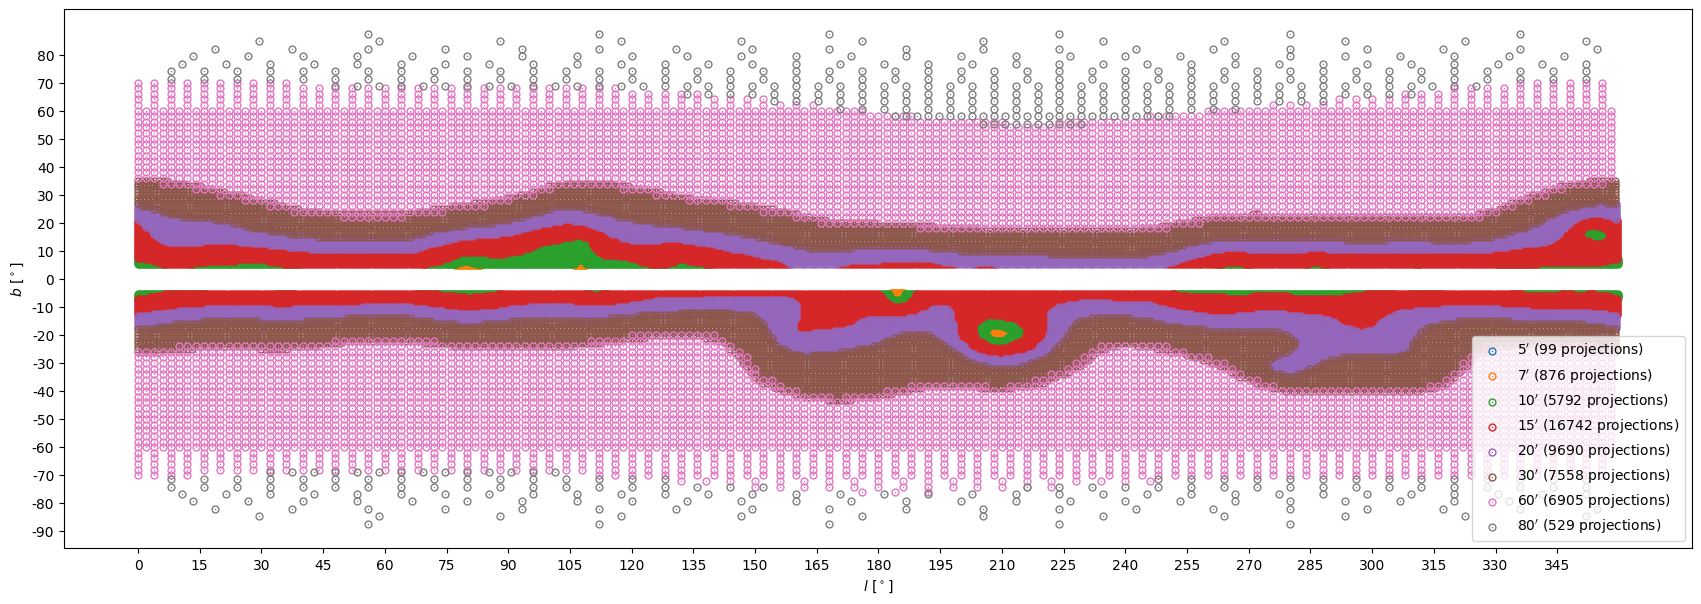

In [14]:
plotting.plot_centers(inference_centers)

In [2]:
with open('data/training_patches.pkl', 'rb') as f:
    train_patches = pickle.load(f)

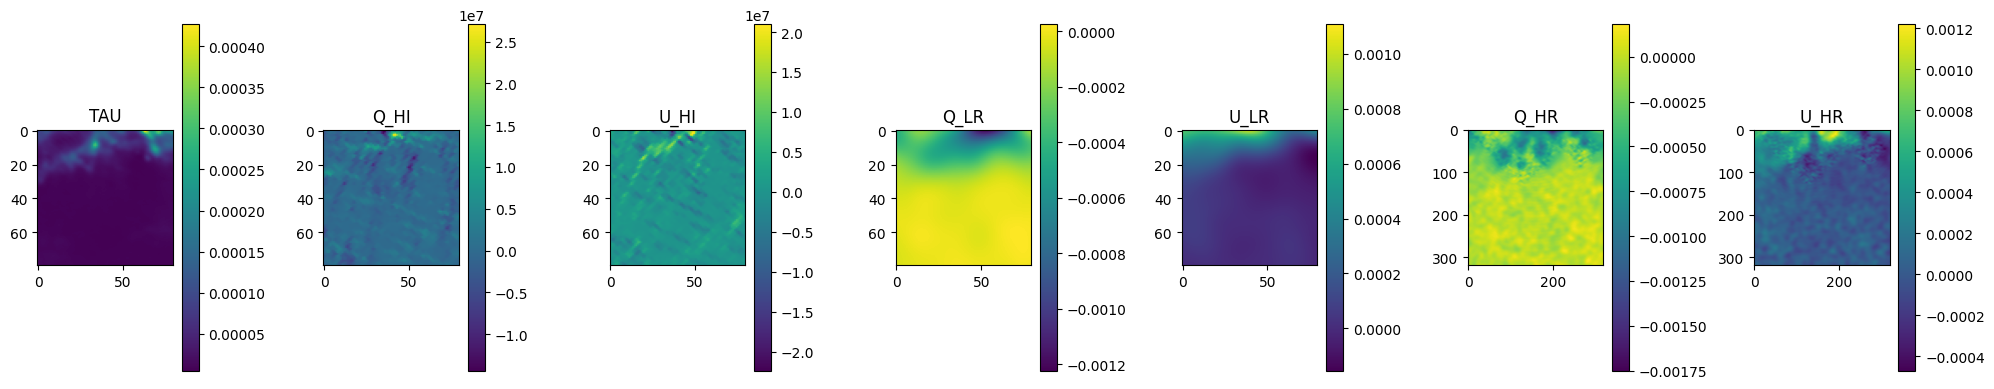

In [5]:
inp, tgt = train_patches[7]['in'][0], train_patches[7]['out'][0]
plotting.plot_patch(inp, tgt)

In [9]:
with open('data/training_centers.pkl', 'rb') as f:
    train_centers = pickle.load(f)

with open('data/smoothed_maps/smoothed_map_5_amin.pkl', 'rb') as f:
    sm5 = pickle.load(f)

with open('data/smoothed_maps/smoothed_map_7_amin.pkl', 'rb') as f:
    sm7 = pickle.load(f)

In [8]:
lon, lat = train_centers[7]['lon'][0], train_centers[7]['lat'][0]

In [20]:
header = proj_tools.set_header(lon, lat, proj_tools.get_patch_size_deg(7, 20) / 320, 320)
plt.imshow(proj_tools.h2f(sm5[2], header))
plt.colorbar()

In [21]:
plt.imshow(proj_tools.h2f(sm7[2], header))
plt.colorbar()

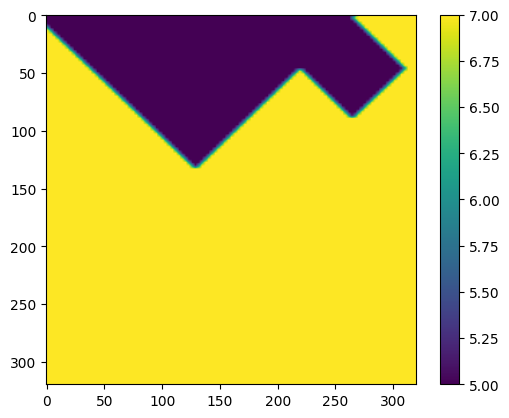

In [19]:
plt.imshow(proj_tools.h2f(res_mask, header))
plt.colorbar()

In [3]:
with open('data/dummy_inf_patches.pkl', 'rb') as f:
    inf_patches = pickle.load(f)

In [8]:
plotting.plot_inf_patch(inf_patches[15][0])

In [14]:
# plot model outputs
with open('data/sr_patches.pkl', 'rb') as f:
    sr_patches = pickle.load(f)

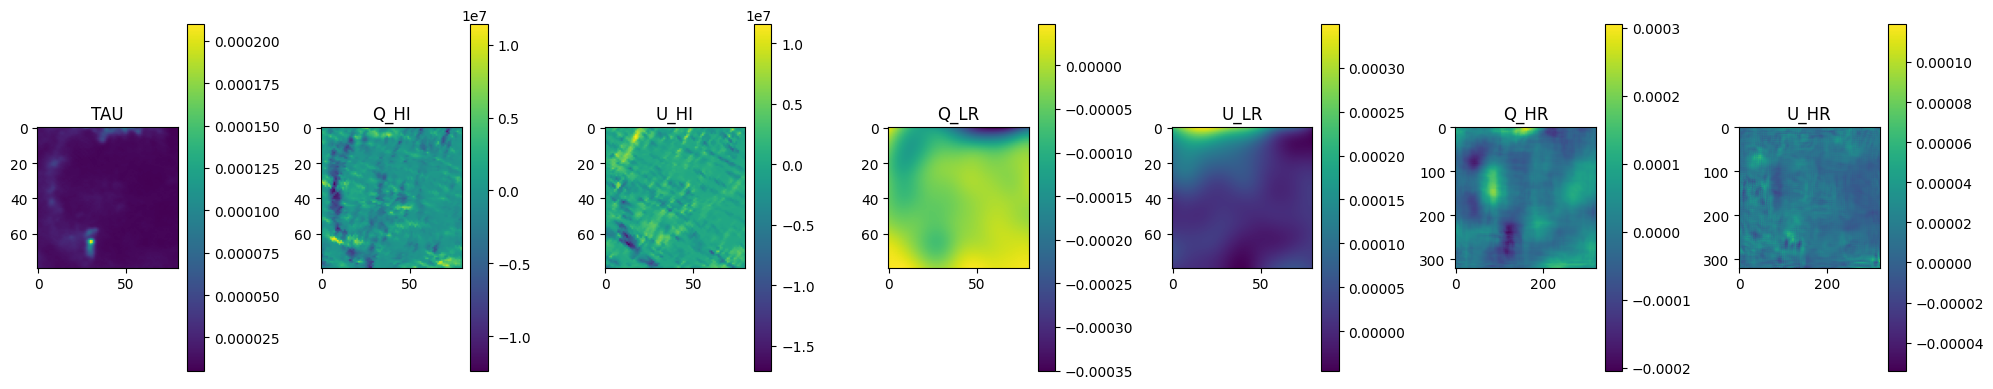

In [15]:
plotting.plot_patch(inf_patches[10][0], sr_patches[10][0])

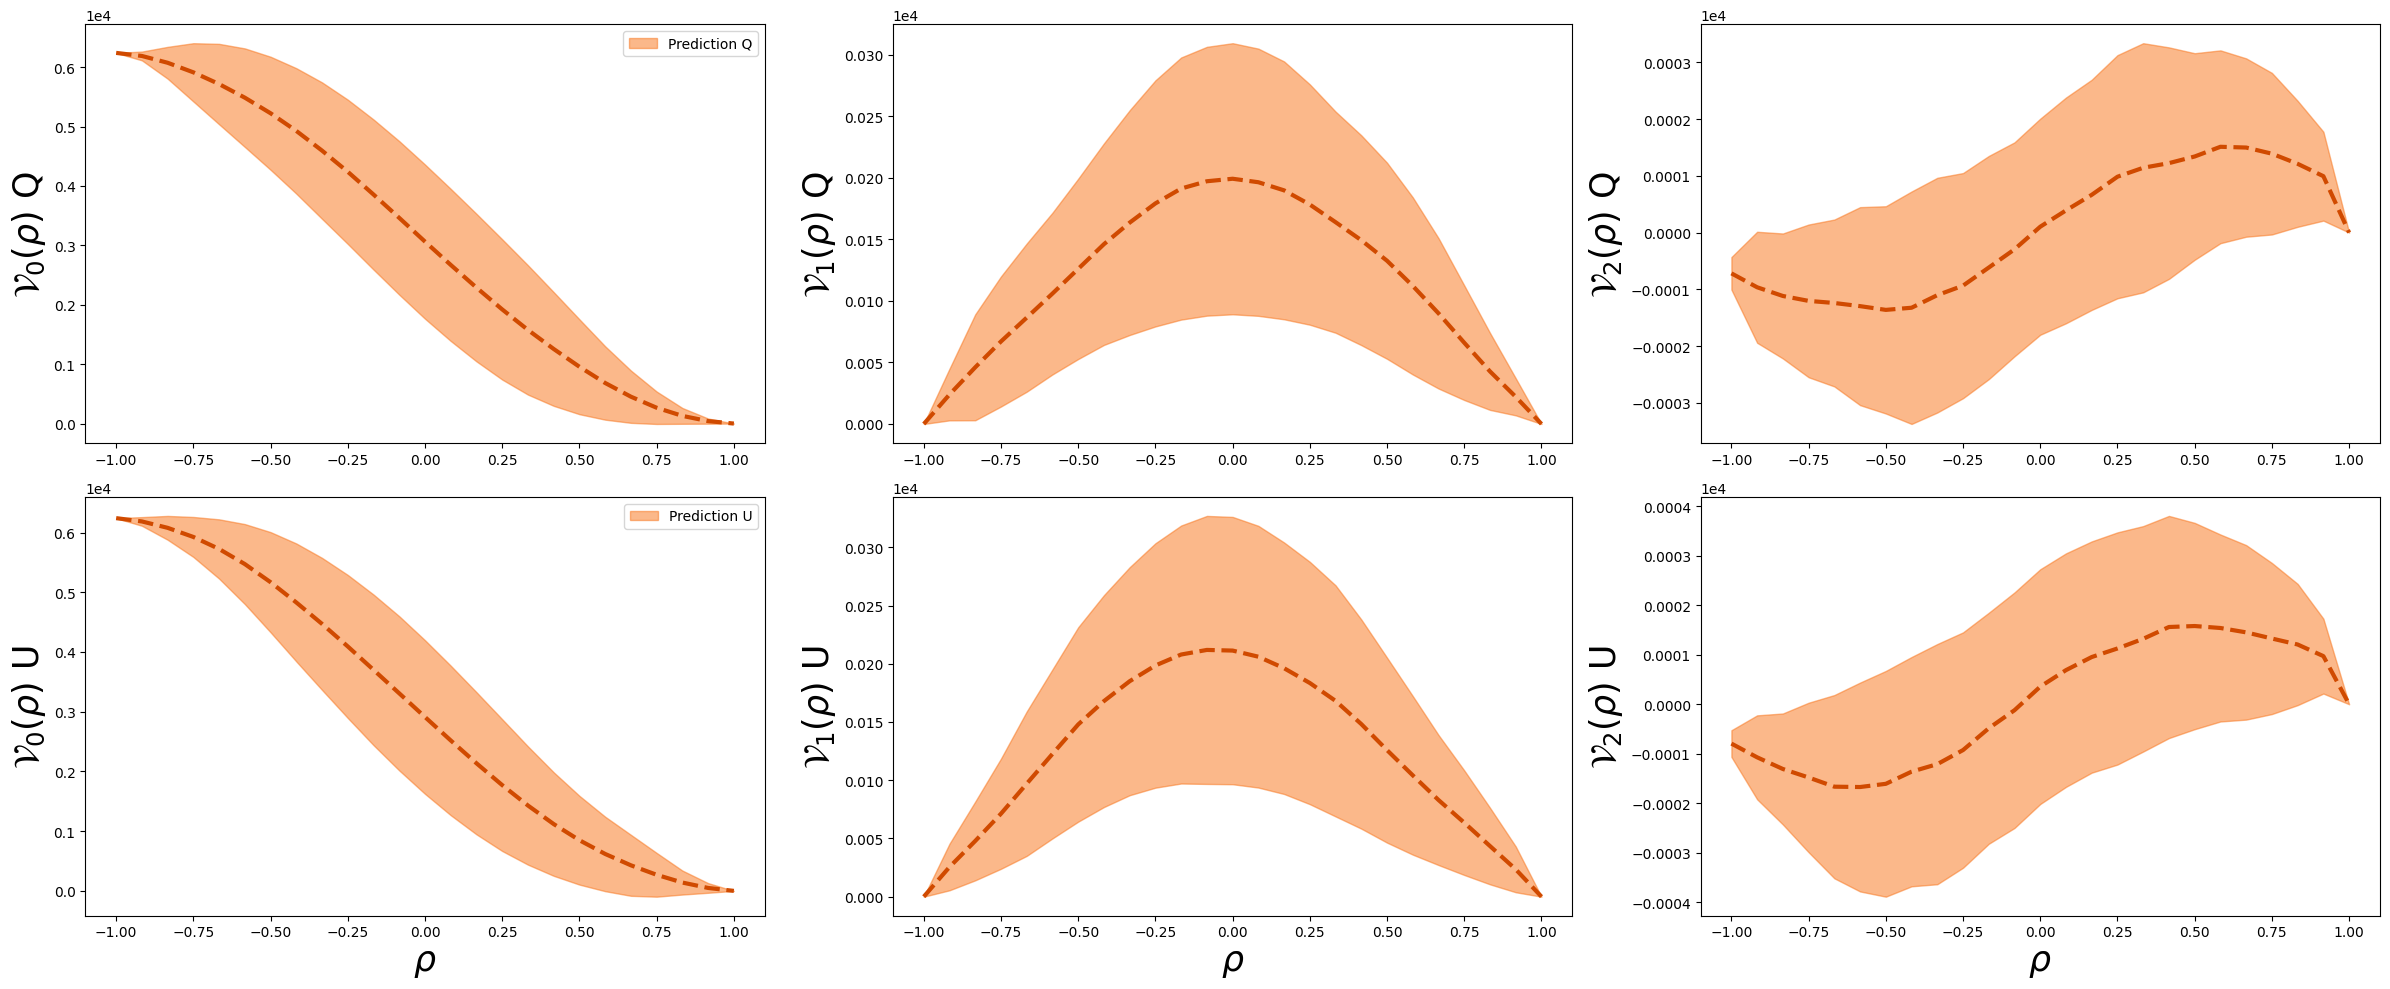

In [19]:
# MF
plotting.plot_MF(inf_patches[7][:, -2:, ...])

(80, 80) (80, 80)


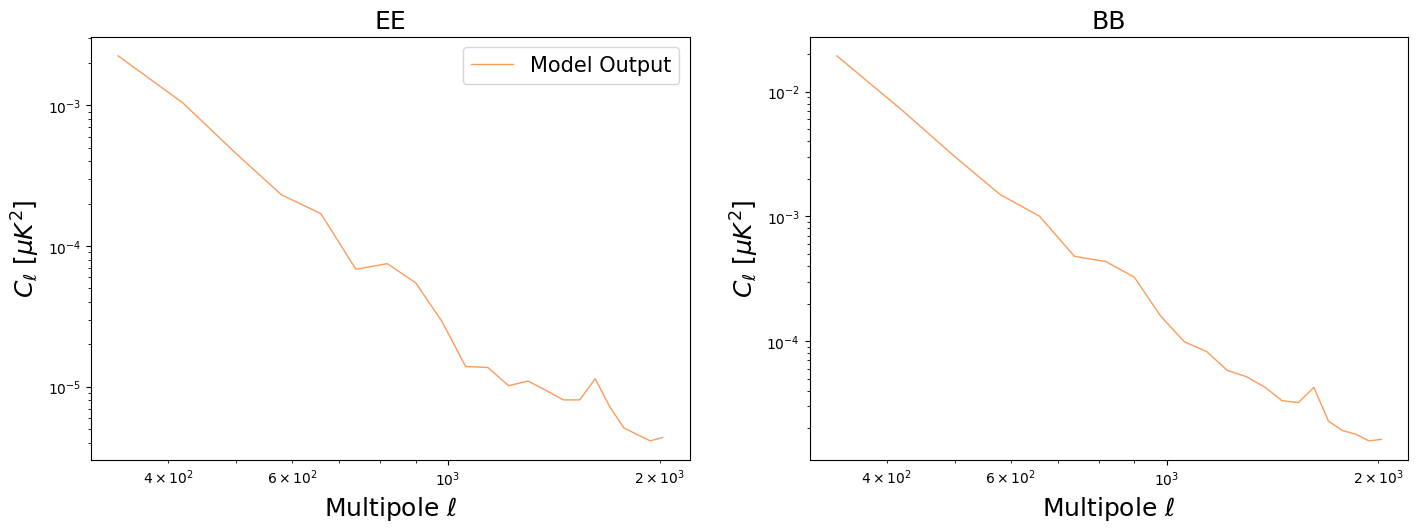

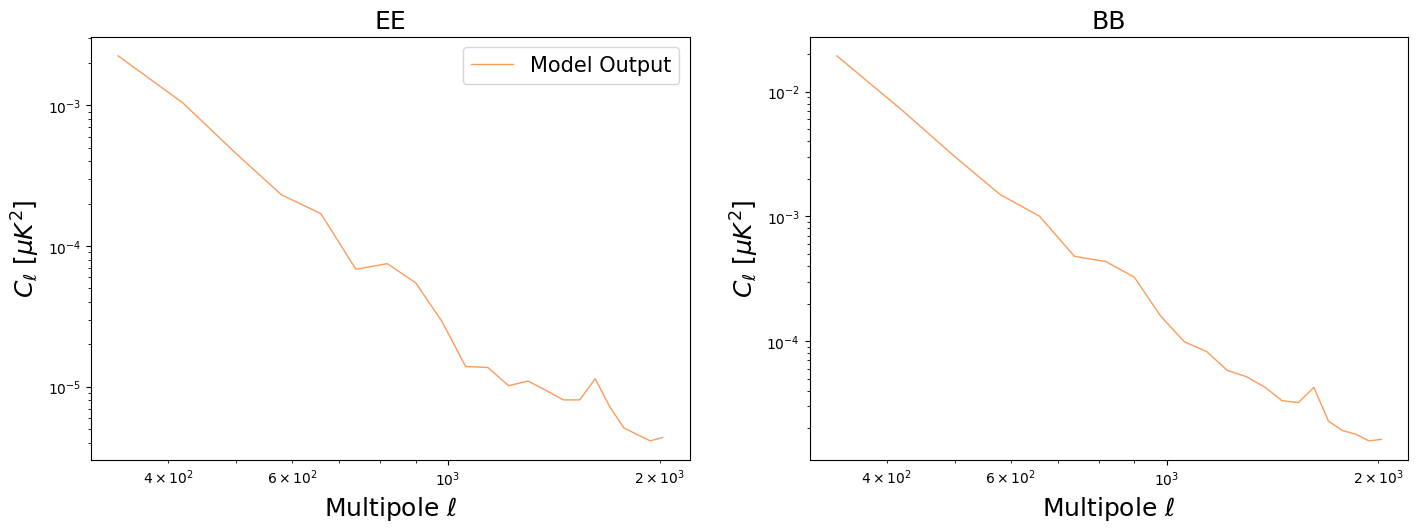

In [12]:
# Power Spectrum
plotting.plot_power_spectra_patch(15, inf_patches[15][0, -2:, ...])

In [14]:
# plot full sky reprojection + overlaps